# Análisis exploratorio de incidencia delictiva en México

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df_delitos = pd.read_csv('data/delitos.csv')
df_datos_delitos =  pd.read_csv('data/datos_delitos.csv', encoding='ISO-8859-1')


In [88]:
df_delitos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153600 entries, 0 to 153599
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   anio            153600 non-null  int64  
 1   clave_ent       153600 non-null  int64  
 2   entidad         153600 non-null  object 
 3   tipo_de_delito  153600 non-null  object 
 4   nombre_mes      153600 non-null  object 
 5   fecha           153600 non-null  object 
 6   frecuencia      153600 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ MB


In [89]:
entidades= df_delitos["entidad"].value_counts()
entidades

entidad
Aguascalientes                     4800
Baja California                    4800
Baja California Sur                4800
Campeche                           4800
Coahuila de Zaragoza               4800
Colima                             4800
Chiapas                            4800
Chihuahua                          4800
Ciudad de México                   4800
Durango                            4800
Guanajuato                         4800
Guerrero                           4800
Hidalgo                            4800
Jalisco                            4800
México                             4800
Michoacán de Ocampo                4800
Morelos                            4800
Nayarit                            4800
Nuevo León                         4800
Oaxaca                             4800
Puebla                             4800
Querétaro                          4800
Quintana Roo                       4800
San Luis Potosí                    4800
Sinaloa                         

In [73]:
delitos= df["tipo_de_delito"].value_counts()
delitos

tipo_de_delito
Aborto                                                                           3840
Abuso de confianza                                                               3840
Abuso sexual                                                                     3840
Acoso sexual                                                                     3840
Allanamiento de morada                                                           3840
Amenazas                                                                         3840
Contra el medio ambiente                                                         3840
Corrupción de menores                                                            3840
Daño a la propiedad                                                              3840
Delitos cometidos por servidores públicos                                        3840
Despojo                                                                          3840
Electorales                            

In [108]:
df_homicidios = df_delitos[(df_delitos["tipo_de_delito"].str.contains('homicidio', case=False))].copy()
df_homicidios["tipo_de_delito"].value_counts()

tipo_de_delito
Homicidio    3840
Name: count, dtype: int64

In [95]:
df_homicidos_dolosos = df_datos_delitos[
    (df_datos_delitos['Tipo de delito'].str.contains('homicidio', case=False)) &
    (df_datos_delitos['Subtipo de delito'].str.contains('doloso', case=False))
    ].copy()
df_homicidos_dolosos['Subtipo de delito'].value_counts()

Subtipo de delito
Homicidio doloso    1280
Name: count, dtype: int64

#### Ejercicio 1: Elige 3 estados de la república y grafica una serie de tiempo de la frecuencia abosluta de homicidios dolosos de enero 2015 a julio 2019 en estas tres entidades

In [176]:
#filtrado de dataframe

estados = ['Nuevo León', 'Yucatán', 'Tlaxcala'] 
df_3_estados_datos_delitos = df_homicidos_dolosos[
    (df_homicidos_dolosos['Entidad'].isin(estados))  &
    (df_homicidos_dolosos['Año'] >= 2015) & (df_homicidos_dolosos['Año'] <= 2019)
    ].copy()

# Voy a setear los mees de 2019 a cero para no sumarlos
df_meses_a_cero = [mes for mes in ['Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'] if mes in df_3_estados_datos_delitos.columns]
mask_2019 = df_3_estados_datos_delitos['Año'] == 2019
valores_originales = df_3_estados_datos_delitos.loc[mask_2019, df_meses_a_cero].copy()
# loc es el método de indexación basada en etiquetas de pandas. 
# Permite seleccionar y modificar datos usando etiquetas (labels) en lugar de posiciones numéricas
df_3_estados_datos_delitos.loc[mask_2019 , df_meses_a_cero] = 0

# transformar de formato ancho a formato largo
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 
            'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

mes_a_numero = {mes: i+1 for i, mes in enumerate(meses)}

df_largo = df_3_estados_datos_delitos.melt(   
    id_vars=['Entidad', 'Año'],
    value_vars=meses,
    var_name='Mes',
    value_name='Frecuencia'
)

# Mapear mes a número y ordenar
df_largo['Mes_Numero'] = df_largo['Mes'].map(mes_a_numero)
df_largo = df_largo.sort_values(['Año', 'Mes_Numero', 'Entidad']).reset_index(drop=True)

# Crear columna de fecha (primer día del mes)
df_largo['Fecha'] = pd.to_datetime(
    df_largo['Año'].astype(str) + '-' + 
    df_largo['Mes_Numero'].astype(str).str.zfill(2) + '-01'
)


df_largo


,Entidad,Año,Mes,Frecuencia,Mes_Numero,Fecha
0,Nuevo León,2015,Enero,21.0,1,2015-01-01
1,Nuevo León,2015,Enero,7.0,1,2015-01-01
2,Nuevo León,2015,Enero,6.0,1,2015-01-01
3,Nuevo León,2015,Enero,0.0,1,2015-01-01
4,Tlaxcala,2015,Enero,3.0,1,2015-01-01
...,...,...,...,...,...,...
715,Tlaxcala,2019,Diciembre,0.0,12,2019-12-01
716,Yucatán,2019,Diciembre,0.0,12,2019-12-01
717,Yucatán,2019,Diciembre,0.0,12,2019-12-01
718,Yucatán,2019,Diciembre,0.0,12,2019-12-01


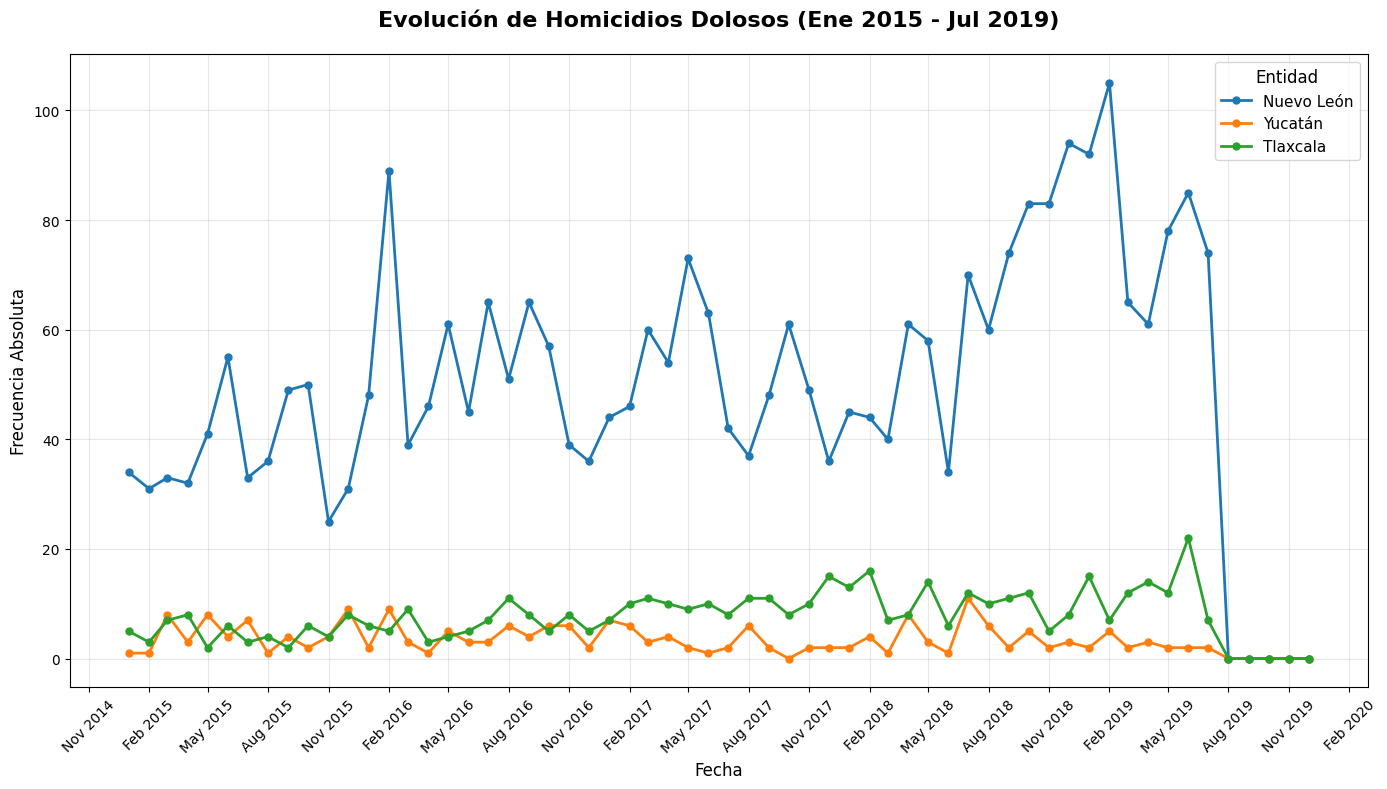

In [177]:
plt.figure(figsize=(14, 8))

# Graficar cada estado por separado
for estado in estados:
    # Filtrar datos del estado
    datos_estado = df_largo[df_largo['Entidad'] == estado]
    
    # Agrupar por mes y sumar frecuencia
    serie_temporal = datos_estado.groupby('Fecha')['Frecuencia'].sum()
    
    # Graficar
    plt.plot(serie_temporal.index, serie_temporal.values, 
             marker='o', linewidth=2, markersize=5, label=estado)

plt.title('Evolución de Homicidios Dolosos (Ene 2015 - Jul 2019)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Frecuencia Absoluta', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title='Entidad', title_fontsize=12, fontsize=11)

# Formatear eje X
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=3))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [178]:
#  Ahora usando df_delitos (que no dice si son homidicios dolosos o culposos)

estados = ['Nuevo León', 'Yucatán', 'Tlaxcala'] 
df_3_estados_delitos = df_homicidios[
    (df_homicidios['entidad'].isin(estados))  &
    (df_homicidios['anio'] >= 2015) & (df_homicidios['anio'] <= 2019)
    ].copy()

df_3_estados_delitos['fecha'] = pd.to_datetime(df_3_estados_delitos['fecha'], errors='coerce')

fecha_inicio = pd.Timestamp('2015-01-01')
fecha_fin = pd.Timestamp('2019-07-31')

df_3_estados_delitos = df_3_estados_delitos[
    (df_3_estados_delitos['fecha'] >= fecha_inicio) & 
    (df_3_estados_delitos['fecha'] <= fecha_fin)
].copy()

df_3_estados_delitos

,anio,clave_ent,entidad,tipo_de_delito,nombre_mes,fecha,frecuencia
8856,2015,19,Nuevo León,Homicidio,abril,2015-04-01,77.0
8857,2015,19,Nuevo León,Homicidio,agosto,2015-08-01,82.0
8858,2015,19,Nuevo León,Homicidio,diciembre,2015-12-01,96.0
8859,2015,19,Nuevo León,Homicidio,enero,2015-01-01,66.0
8860,2015,19,Nuevo León,Homicidio,febrero,2015-02-01,67.0
...,...,...,...,...,...,...,...
76060,2019,31,Yucatán,Homicidio,febrero,2019-02-01,7.0
76061,2019,31,Yucatán,Homicidio,julio,2019-07-01,9.0
76062,2019,31,Yucatán,Homicidio,junio,2019-06-01,15.0
76063,2019,31,Yucatán,Homicidio,marzo,2019-03-01,8.0


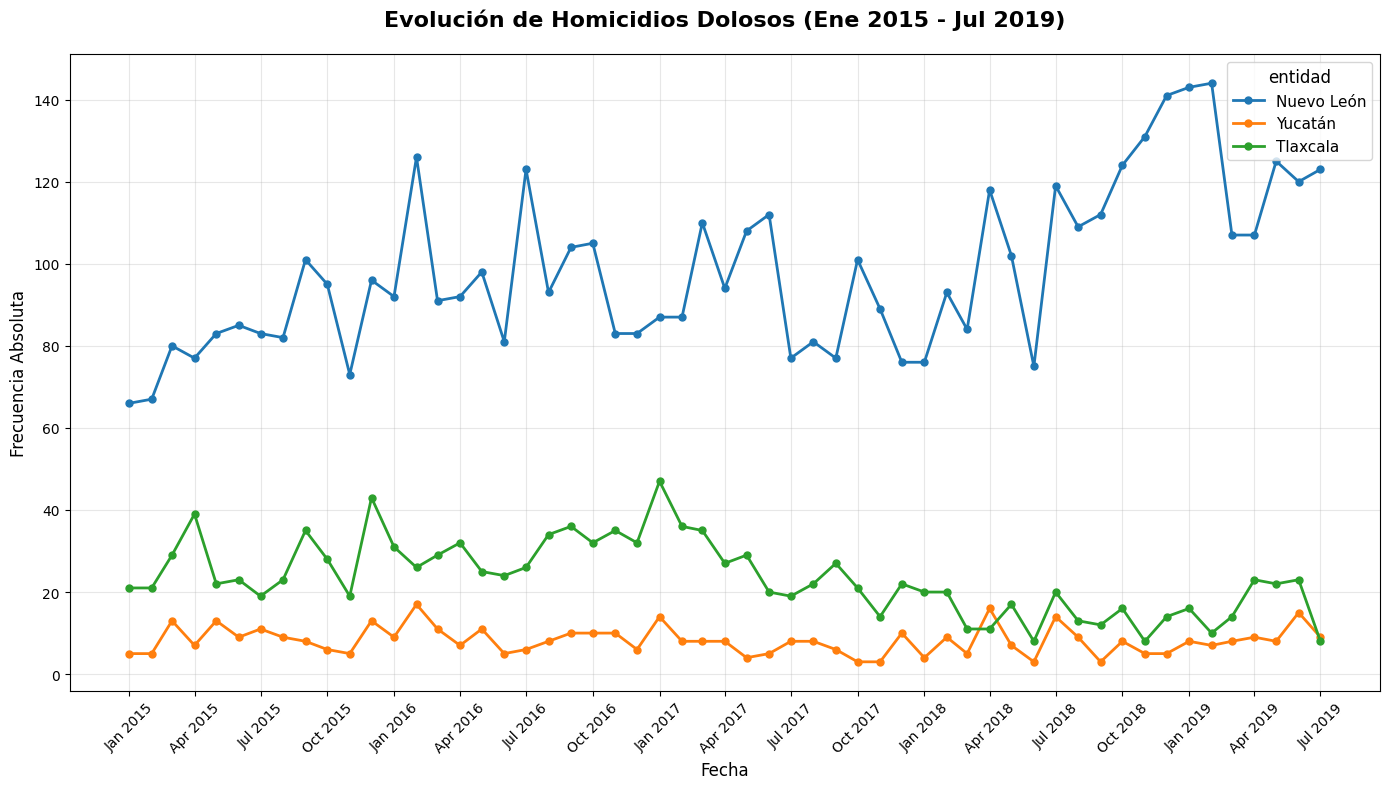

In [179]:
plt.figure(figsize=(14, 8))

# Graficar cada estado por separado
for estado in estados:
    # Filtrar datos del estado
    datos_estado = df_3_estados_delitos[df_3_estados_delitos['entidad'] == estado]
    
    # Agrupar por mes y sumar frecuencia
    serie_temporal = datos_estado.groupby('fecha')['frecuencia'].sum()
    
    # Graficar
    plt.plot(serie_temporal.index, serie_temporal.values, 
             marker='o', linewidth=2, markersize=5, label=estado)

plt.title('Evolución de Homicidios Dolosos (Ene 2015 - Jul 2019)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Frecuencia Absoluta', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title='entidad', title_fontsize=12, fontsize=11)

# Formatear eje X
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=3))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Ejercicio 2: Contetas las siguientes  preguntas:
1. ¿Cuántos homicidios dolosos hubo en Colima en el 2018?
2. ¿Cuantos robos de vehículo automotor ha habido en el 2019?
3. Obten la suma de homicidos dolosos y feminidios en toda la República Mexicana en cada año.
4. ¿En qué mes y en qué municipio ha ocurrido el mayor número de feminicidios?
5. ¿En qué año y en qué estado ha ocurrido el mayor número de feminicidios?

In [180]:
#1 Homicidios dolosos en Colima en 2018
estados = ['Colima']  
df_dolosos_colima_2018 = df_homicidos_dolosos[
    (df_homicidos_dolosos['Entidad'].isin(estados)) & 
    (df_homicidos_dolosos['Año'] == 2018) ].copy()


# transformar de formato ancho a formato largo
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 
            'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

mes_a_numero = {mes: i+1 for i, mes in enumerate(meses)}

df_dolosos_colima_2018_largo = df_dolosos_colima_2018.melt(   
    id_vars=['Entidad', 'Año'],
    value_vars=meses,
    var_name='Mes',
    value_name='Frecuencia'
)

# Mapear mes a número y ordenar
df_dolosos_colima_2018_largo['Mes_Numero'] = df_dolosos_colima_2018_largo['Mes'].map(mes_a_numero)
df_dolosos_colima_2018_largo = df_dolosos_colima_2018_largo.sort_values(['Año', 'Mes_Numero', 'Entidad']).reset_index(drop=True)

# Crear columna de fecha (primer día del mes)
df_dolosos_colima_2018_largo['Fecha'] = pd.to_datetime(
    df_dolosos_colima_2018_largo['Año'].astype(str) + '-' + 
df_dolosos_colima_2018_largo['Mes_Numero'].astype(str).str.zfill(2) + '-01'
)

df_dolosos_colima_2018_largo

total_dolosos_colima_2018 = df_dolosos_colima_2018_largo['Frecuencia'].sum()
print(f'Total de homicidios dolosos en Colima en 2018: {total_dolosos_colima_2018}')

Total de homicidios dolosos en Colima en 2018: 617.0


In [181]:
#1 Homicidios dolosos en Colima en 2018
# ahora con df_delitos (no dice si son dolosos o culposos)
df_homicidios_colima_2018 = df_homicidios[
    (df_homicidios['entidad'] == 'Colima') & 
    (df_homicidios['anio'] == 2018)
].copy()

total_homicidios_colima_2018 = df_homicidios_colima_2018['frecuencia'].sum()
print(f'Total de homicidios en Colima en 2018: {total_homicidios_colima_2018}')



Total de homicidios en Colima en 2018: 726.0


In [182]:
#2 Robo de vehiculo en  2019 
# uso df_datos_delitos porque tiene el subtipo de delito adecuado
df_robo_vehiculo_2019 = df_datos_delitos[
    (df_datos_delitos['Tipo de delito'].str.contains('Robo', case=False)) &
    (df_datos_delitos['Subtipo de delito'].str.contains('Vehículo', case=False)) &
    (df_datos_delitos['Año'] == 2019)
].copy()


# transformar de formato ancho a formato largo
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 
            'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

mes_a_numero = {mes: i+1 for i, mes in enumerate(meses)}

df_robo_vehiculo_2019_largo = df_robo_vehiculo_2019.melt(   
    id_vars=['Entidad', 'Año'],
    value_vars=meses,
    var_name='Mes',
    value_name='Frecuencia'
)

# Mapear mes a número y ordenar
df_robo_vehiculo_2019_largo['Mes_Numero'] = df_robo_vehiculo_2019_largo['Mes'].map(mes_a_numero)
df_robo_vehiculo_2019_largo = df_robo_vehiculo_2019_largo.sort_values(['Año', 'Mes_Numero', 'Entidad']).reset_index(drop=True)

# Crear columna de fecha (primer día del mes)
df_robo_vehiculo_2019_largo['Fecha'] = pd.to_datetime(
    df_robo_vehiculo_2019_largo['Año'].astype(str) + '-' + 
df_robo_vehiculo_2019_largo['Mes_Numero'].astype(str).str.zfill(2) + '-01'
)

df_robo_vehiculo_2019_largo

total_robo_vehiculo_2019 = df_robo_vehiculo_2019_largo['Frecuencia'].sum()
print(f'Total de robo de vehículo en 2019: {total_robo_vehiculo_2019}')

Total de robo de vehículo en 2019: 187661.0


In [183]:
#2 Robo de vehiculo en  2019 
# Ahora con df_delitos (El el frame no india si es de vehiculo o no)
df_robos_vehiculo_2019 = df_delitos[
    (df_delitos['tipo_de_delito'].str.contains('robo', case=False)) &
    (df_delitos['anio'] == 2019)
    ].copy()

total_robos_vehiculo_2019 = df_robos_vehiculo_2019['frecuencia'].sum()
print(f'Total de robo de vehículo en 2019: {total_robos_vehiculo_2019}')

Total de robo de vehículo en 2019: 766096.0


In [184]:
#3 Suma de homicidios dolosos y feminicidios en toda la republica mexicana en cada año
# primero con df_datos_delitos que tiene el subtipo de delito adecuado

df_2_datos_delitos = df_datos_delitos[
    (df_datos_delitos['Subtipo de delito'].str.contains('Homicidio doloso', case=False)) |
    (df_datos_delitos['Subtipo de delito'].str.contains('Feminicidio', case=False)) ].copy()

# Creamos la columna 'Total' sumando horizontalmente (axis=1) solo los meses
df_2_datos_delitos['frecuencia'] = df_2_datos_delitos[meses].sum(axis=1)

# Mostramos el resultado
df_2_datos_delitos_resumen = df_2_datos_delitos.groupby(['Subtipo de delito', 'Año'])['frecuencia'].sum().reset_index()
df_2_datos_delitos_resumen

,Subtipo de delito,Año,frecuencia
0,Feminicidio,2015,413.0
1,Feminicidio,2016,608.0
2,Feminicidio,2017,744.0
3,Feminicidio,2018,899.0
4,Feminicidio,2019,944.0
5,Feminicidio,2020,947.0
6,Feminicidio,2021,981.0
7,Feminicidio,2022,961.0
8,Feminicidio,2023,832.0
9,Feminicidio,2024,401.0


In [185]:
#3 Suma de homicidios dolosos y feminicidios en toda la republica mexicana en cada año
# Ahora con df_delitos (El el frame no dice si es doloso o no)
df_2_delitos = df_delitos[
    (df_delitos['tipo_de_delito'].str.contains('Homicidio', case=False)) |
    (df_delitos['tipo_de_delito'].str.contains('Feminicidio', case=False)) 
    ].copy()

# Mostramos el resultado
df_2_delitos_resumen = df_2_delitos.groupby(['tipo_de_delito', 'anio'])['frecuencia'].sum().reset_index()
df_2_delitos_resumen


,tipo_de_delito,anio,frecuencia
0,Feminicidio,2015,413.0
1,Feminicidio,2016,608.0
2,Feminicidio,2017,744.0
3,Feminicidio,2018,899.0
4,Feminicidio,2019,944.0
5,Feminicidio,2020,947.0
6,Feminicidio,2021,981.0
7,Feminicidio,2022,961.0
8,Feminicidio,2023,832.0
9,Feminicidio,2024,401.0


#### Ejercicio 3: Haz una gráfica de pastel de tipos de delito. Deberás crear una gráfica para cada año. Utilzia la función subplots de matplotlib

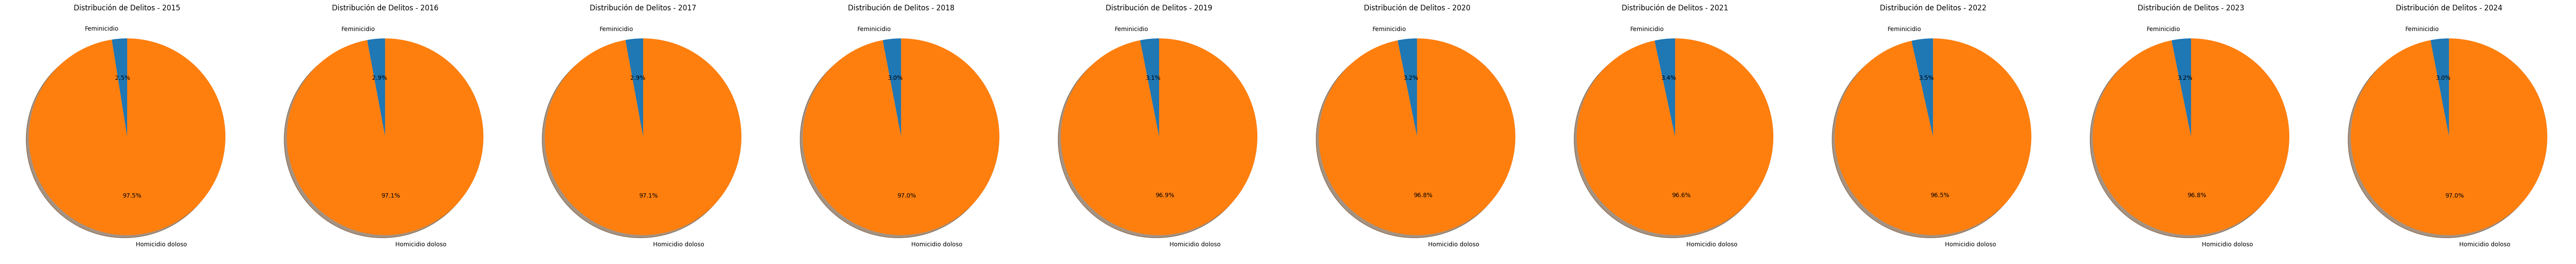

In [186]:
# Obtenemos la lista de años únicos ordenados

years = sorted(df_2_datos_delitos_resumen['Año'].unique())
n_years = len(years)

# Creamos los subplots: 1 fila, N columnas (una por año)
# figsize ajusta el ancho dependiendo de cuántos años haya
fig, axes = plt.subplots(nrows=1, ncols=n_years, figsize=(6 * n_years, 6))

# Si solo hay 1 año, 'axes' no es una lista, así que lo convertimos en una para que el loop funcione
if n_years == 1:
    axes = [axes]

for ax, year in zip(axes, years):
    # Filtramos los datos solo para el año actual del ciclo
    data_year = df_2_datos_delitos_resumen[df_2_datos_delitos_resumen['Año'] == year]
    
    # Creamos el pie chart en el eje correspondiente (ax)
    ax.pie(
        data_year['frecuencia'], 
        labels=data_year['Subtipo de delito'], 
        autopct='%1.1f%%',  # Muestra el porcentaje
        startangle=90,      # Rota el inicio para estética
        shadow=True
    )
    
    # Ponemos título a cada sub-gráfica
    ax.set_title(f'Distribución de Delitos - {year}')

# Ajustamos el diseño para que no se encimen los textos
plt.tight_layout()
plt.show()

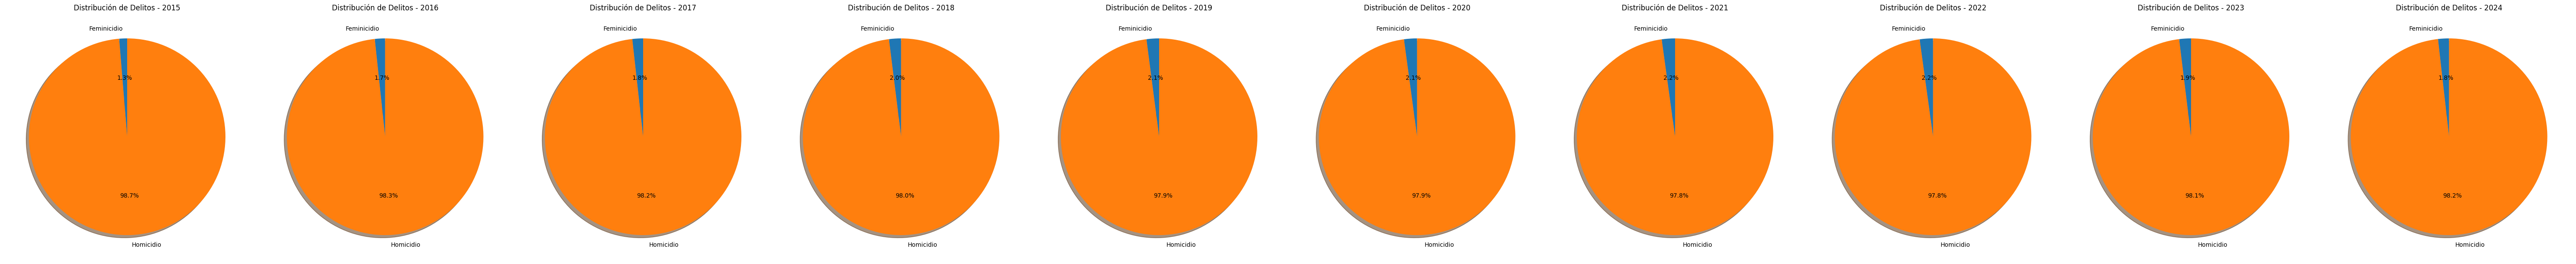

In [174]:
# ahora con df_delitos

# Obtenemos la lista de años únicos ordenados
years = sorted(df_2_delitos_resumen['anio'].unique())
n_years = len(years)

# Creamos los subplots: 1 fila, N columnas (una por año)
# figsize ajusta el ancho dependiendo de cuántos años haya
fig, axes = plt.subplots(nrows=1, ncols=n_years, figsize=(6 * n_years, 6))

# Si solo hay 1 año, 'axes' no es una lista, así que lo convertimos en una para que el loop funcione
if n_years == 1:
    axes = [axes]

for ax, year in zip(axes, years):
    # Filtramos los datos solo para el año actual del ciclo
    data_year = df_2_delitos_resumen[df_2_delitos_resumen['anio'] == year]
    
    # Creamos el pie chart en el eje correspondiente (ax)
    ax.pie(
        data_year['frecuencia'], 
        labels=data_year['tipo_de_delito'], 
        autopct='%1.1f%%',  # Muestra el porcentaje
        startangle=90,      # Rota el inicio para estética
        shadow=True
    )
    
    # Ponemos título a cada sub-gráfica
    ax.set_title(f'Distribución de Delitos - {year}')

# Ajustamos el diseño para que no se encimen los textos
plt.tight_layout()
plt.show()


---
#### Calcula la tasa por 100,000 habitantes
##### Tasa por 100,000 habitantes
Mostrar el total de delitos en una entidad no nos sirve de mucho. Es mucho más útil calcular la tasa de incidencia delictiva por cada 100,000 habitantes

$$
tasa = \frac{delitos\space totales}{población} \times 100,000
$$

Esta tasa la podemos anualizar multiplicándola por un factor de 12
$$
tasa\space anualizada = tasa \times 12
$$

Población por entidad federativa según [la encuesta intercensal 2015](https://www.inegi.org.mx/programas/intercensal/2015/)

No tienes que descargar nada. Ya están los datos en la carpeta data

In [187]:
pobs = pd.read_csv('data/poblacion_entidades_2015.csv', encoding='iso-8859-1', sep=";")
pobs = pobs[['Cve_Entidad', 'Entidad', 'Poblacion']]
pobs = pobs.rename(columns={'Cve_Entidad':'clave_entidad', 'Entidad':'entidad', 'Poblacion':'poblacion'})
pobs.head()

,clave_entidad,entidad,poblacion
0,1,Aguascalientes,1312544.0
1,2,Baja California,3315766.0
2,3,Baja California Sur,712029.0
3,4,Campeche,899931.0
4,5,Coahuila de Zaragoza,5217908.0


In [191]:
# delitos totales hubo por y año.
delitos_totales = df_delitos.groupby(['clave_ent', 'entidad', 'anio'])['frecuencia'].sum().reset_index()

# unimos los dataframe
df_final = pd.merge(
    delitos_totales, 
    pobs[['clave_entidad', 'poblacion']], # Solo traemos las columnas útiles
    left_on='clave_ent',                # Llave en df_delitos
    right_on='clave_entidad',             # Llave en pobs
    how='inner'                         # Solo registros que existan en ambos
)

# Aplicamos la fórmula: (Delitos / Población) * 100,000
df_final['Tasa_x_100k'] = (df_final['frecuencia'] / df_final['poblacion']) * 100000

df_final


,clave_ent,entidad,anio,frecuencia,clave_entidad,poblacion,Tasa_x_100k
0,1,Aguascalientes,2015,23212.0,1,1312544.0,1768.474047
1,1,Aguascalientes,2016,23729.0,1,1312544.0,1807.863203
2,1,Aguascalientes,2017,33548.0,1,1312544.0,2555.952410
3,1,Aguascalientes,2018,38834.0,1,1312544.0,2958.681766
4,1,Aguascalientes,2019,38429.0,1,1312544.0,2927.825658
...,...,...,...,...,...,...,...
315,32,Zacatecas,2020,22742.0,32,1579209.0,1440.088044
316,32,Zacatecas,2021,25110.0,32,1579209.0,1590.036531
317,32,Zacatecas,2022,25546.0,32,1579209.0,1617.645290
318,32,Zacatecas,2023,26646.0,32,1579209.0,1687.300414
